In [1]:
import nnet
import numpy as np
import matplotlib.pyplot as plt
import os

from activation_funcs import Sigmoid

In [2]:
np.random.seed(0) # set random seed

In [3]:
FIGURE_PATH = "figures/hw5"

os.makedirs(FIGURE_PATH, exist_ok = True)

def figure_path(name: str):
    return os.path.join(FIGURE_PATH, name)

In [4]:
# initialize neural network. single hidden layer w/ 3 nodes
neural_net = nnet.NeuralNet(
    input_size = 1,                 # single node in the input layer
    hidden_size = (3,),             # one hidden layer w/ three neurons
    output_size = 2,                # two nodes in the output layer 
    activation_func = Sigmoid()     # sigmoid activation function
)

In [5]:
# Inputs: decimal values 0-3
decimal = np.array(
    [[0], 
     [1], 
     [2],
     [3]]
)

# Outputs: 3-bit binary represnetation of decimal values
binary = np.array(
    [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]
)

In [6]:
print("Predictions before training")
for i, encoding in zip(range(4), [[0, 0], [0, 1], [1, 0], [1, 1]]):
    prediction = neural_net.predict([i])
    # Compute error
    print(f"Error: {0.5 * np.sum(np.power(prediction - np.array(encoding), 2)):.2f}")
    
    # Show results. Round to nearest integer for prediction.
    print(f"{i} -> b'{int(np.round(prediction[0], 0)[0])}{int(np.round(prediction[1], 0)[0])}")

# Train model. 100 epochs, learning rate of 0.5
neural_net.train(decimal, binary, epoch = 100, rate = 0.5, log_decimation = 1e9)

print("\nPredictions after training")
for i, encoding in zip(range(4), [[0, 0], [0, 1], [1, 0], [1, 1]]):
    prediction = neural_net.predict([i])
    
    print(f"{i} -> b'{int(np.round(prediction[0], 0)[0])}{int(np.round(prediction[1], 0)[0])}")
    print(f"Error: {0.5 * np.sum(np.power(prediction - np.array(encoding).reshape(2, 1), 2)):.2f}")

Predictions before training
Error: 1.20
0 -> b'11
Error: 0.69
1 -> b'11
Error: 0.72
2 -> b'11
Error: 0.05
3 -> b'11

Predictions after training
0 -> b'00
Error: 0.05
1 -> b'00
Error: 0.22
2 -> b'11
Error: 0.24
3 -> b'11
Error: 0.05


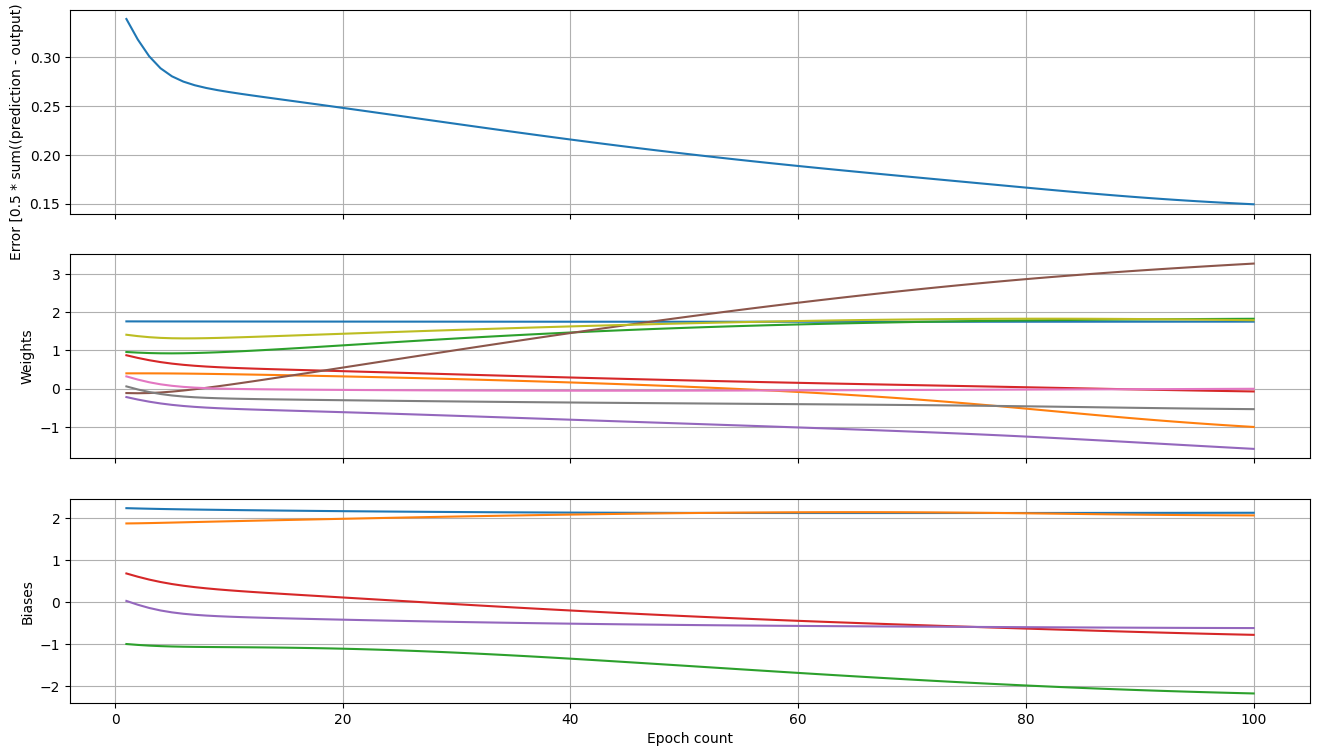

In [7]:
X = np.arange(1, neural_net._iterations.epochs + 1)
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (16, 9))
ax[0].plot(X, np.average(neural_net._iterations.error, axis = 1))
ax[0].set_ylabel("Error [0.5 * sum((prediction - output) ^ 2)]")

ax[1].plot(X, neural_net._iterations.weights)
ax[1].set_ylabel("Weights")

ax[2].plot(X, neural_net._iterations.biases)
ax[2].set_ylabel("Biases")

ax[2].set_xlabel("Epoch count")

for a in ax:
    a.set_axisbelow(True)
    a.grid()

fig.savefig(figure_path("first_attempt.png"))

In [8]:
# initialize neural network. three hidden layers w/ 50, 100, and 50 nodes
neural_net = nnet.NeuralNet(
    input_size = 1, 
    hidden_size = (50,100,50), 
    output_size = 2, 
    activation_func = Sigmoid()
)

In [9]:
print("Predictions before training")
for i, encoding in zip(range(4), [[0, 0], [0, 1], [1, 0], [1, 1]]):
    prediction = neural_net.predict([i])
    print(f"{i} -> b'{int(np.round(prediction[0], 0)[0])}{int(np.round(prediction[1], 0)[0])}")
    print(f"Error: {0.5 * np.sum(np.power(prediction - np.array(encoding), 2)):.2f}")

# Train model. 100 epochs, learning rate of 0.5
neural_net.train(decimal, binary, epoch = 100, rate = 0.5, log_decimation = 1e9)

print("\nPredictions after training")
for i, encoding in zip(range(4), [[0, 0], [0, 1], [1, 0], [1, 1]]):
    prediction = neural_net.predict([i])
    
    print(f"{i} -> b'{int(np.round(prediction[0], 0)[0])}{int(np.round(prediction[1], 0)[0])}")
    print(f"Error: {0.5 * np.sum(np.power(prediction - np.array(encoding).reshape(2, 1), 2)):.2f}")

Predictions before training
0 -> b'10
Error: 1.03
1 -> b'10
Error: 0.75
2 -> b'10
Error: 0.75
3 -> b'10
Error: 0.43

Predictions after training
0 -> b'00
Error: 0.00
1 -> b'01
Error: 0.01
2 -> b'10
Error: 0.01
3 -> b'11
Error: 0.00


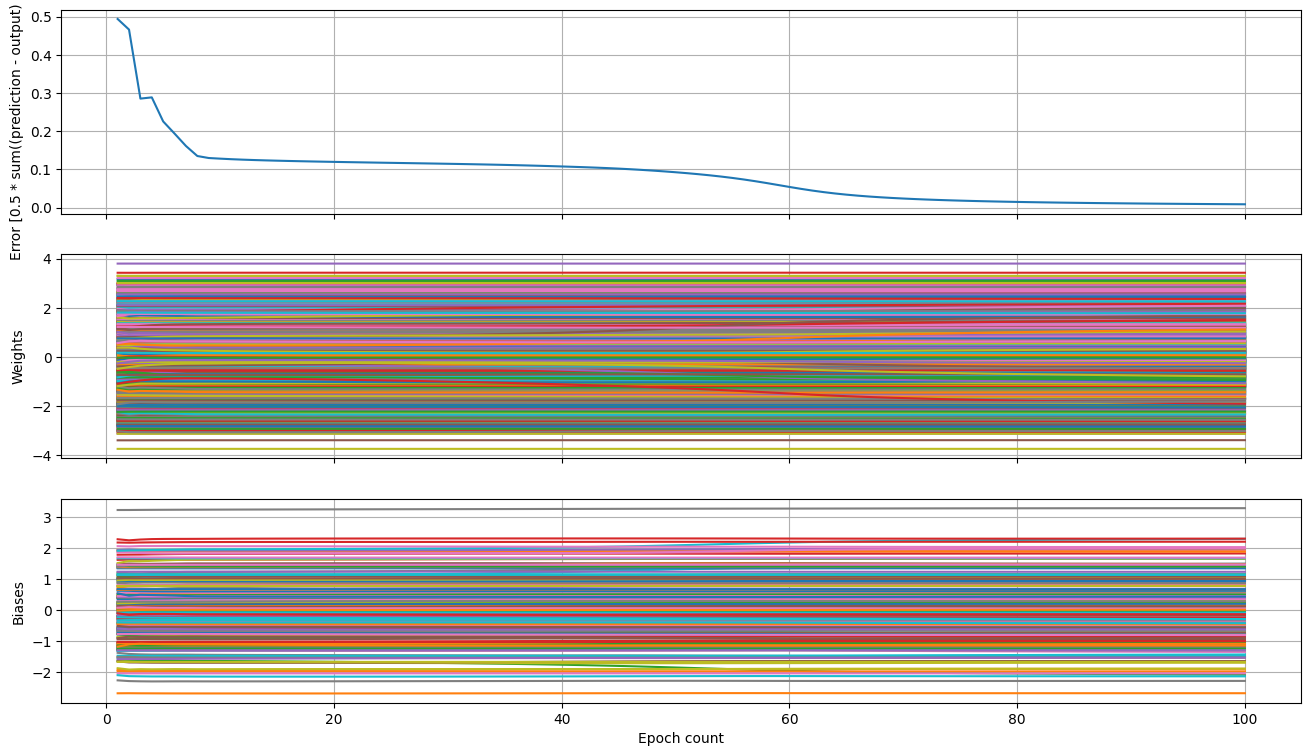

In [10]:
X = np.arange(1, neural_net._iterations.epochs + 1)
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (16, 9))
ax[0].plot(X, np.average(neural_net._iterations.error, axis = 1))
ax[0].set_ylabel("Error [0.5 * sum((prediction - output) ^ 2)]")

ax[1].plot(X, neural_net._iterations.weights)
ax[1].set_ylabel("Weights")

ax[2].plot(X, neural_net._iterations.biases)
ax[2].set_ylabel("Biases")

ax[2].set_xlabel("Epoch count")

for a in ax:
    a.set_axisbelow(True)
    a.grid()

fig.savefig(figure_path("second_attempt.png"))